In [ ]:
# Install required libraries
!pip install pandas numpy matplotlib seaborn jupyter

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: pip install --upgrade pip


In [ ]:
# Create sample sales data
np.random.seed(42)  # For reproducible results

# Create date range (January to December 2023)
dates = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')

# Create data
data = {
    'date': dates,
    'sales': np.random.randint(100, 1000, size=len(dates)),  # Daily sales
    'customer_count': np.random.randint(10, 100, size=len(dates)),  # Daily customers
    'product_category': np.random.choice(['Electronics', 'Clothing', 'Food', 'Books'], len(dates)),
    'payment_method': np.random.choice(['Cash', 'Credit Card', 'Mobile Payment'], len(dates))
}

# Create DataFrame
df = pd.DataFrame(data)

# Add date-based columns
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['day_of_week'] = df['date'].dt.day_name()
df['month_name'] = df['date'].dt.month_name()

# View the data
print("First 5 rows of data:")
print(df.head())
print("\n" + "="*50 + "\n")
print("Last 5 rows of data:")
print(df.tail())

First 5 rows of data:
        date  sales  customer_count product_category  payment_method  year  \
0 2023-01-01    202              98            Books  Mobile Payment  2023   
1 2023-01-02    535              34      Electronics            Cash  2023   
2 2023-01-03    960              27         Clothing     Credit Card  2023   
3 2023-01-04    370              91             Food            Cash  2023   
4 2023-01-05    206              75      Electronics            Cash  2023   

   month  day day_of_week month_name  
0      1    1      Sunday    January  
1      1    2      Monday    January  
2      1    3     Tuesday    January  
3      1    4   Wednesday    January  
4      1    5    Thursday    January  


Last 5 rows of data:
          date  sales  customer_count product_category  payment_method  year  \
360 2023-12-27    203              89         Clothing            Cash  2023   
361 2023-12-28    951              94            Books     Credit Card  2023   
362 2023-12-

In [ ]:
# Basic information about the data
print("Data Shape:", df.shape)
print("\n" + "="*50 + "\n")

print("Column Information and Data Types:")
print(df.info())
print("\n" + "="*50 + "\n")

print("Statistical Summary of Numerical Data:")
print(df.describe())
print("\n" + "="*50 + "\n")

print("Check for Missing Values:")
print(df.isnull().sum())

Data Shape: (365, 10)


Column Information and Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              365 non-null    datetime64[ns]
 1   sales             365 non-null    int64         
 2   customer_count    365 non-null    int64         
 3   product_category  365 non-null    object        
 4   payment_method    365 non-null    object        
 5   year              365 non-null    int32         
 6   month             365 non-null    int32         
 7   day               365 non-null    int32         
 8   day_of_week       365 non-null    object        
 9   month_name        365 non-null    object        
dtypes: datetime64[ns](1), int32(3), int64(2), object(4)
memory usage: 24.4+ KB
None


Statistical Summary of Numerical Data:
                      date       sales  customer_count    year

In [ ]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicates: {duplicates}")

# Remove duplicates if necessary
# df = df.drop_duplicates()

# Check unique values in categorical columns
print("\nUnique Product Categories:", df['product_category'].unique())
print("Unique Payment Methods:", df['payment_method'].unique())

# Check for outliers using IQR method (for sales column)
Q1 = df['sales'].quantile(0.25)
Q3 = df['sales'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['sales'] < lower_bound) | (df['sales'] > upper_bound)]
print(f"\nNumber of outliers in sales column: {len(outliers)}")

Number of duplicates: 0

Unique Product Categories: ['Books' 'Electronics' 'Clothing' 'Food']
Unique Payment Methods: ['Mobile Payment' 'Cash' 'Credit Card']

Number of outliers in sales column: 0


In [ ]:
# 1. Monthly average sales
monthly_avg_sales = df.groupby('month_name')['sales'].mean().sort_values(ascending=False)
print("Monthly Average Sales (Highest to Lowest):")
print(monthly_avg_sales)
print("\n" + "="*50 + "\n")

# 2. Best performing day of week
daily_avg_sales = df.groupby('day_of_week')['sales'].mean().sort_values(ascending=False)
print("Average Sales by Day of Week:")
print(daily_avg_sales)
print("\n" + "="*50 + "\n")

# 3. Sales by product category
category_sales = df.groupby('product_category')['sales'].sum().sort_values(ascending=False)
print("Total Sales by Product Category:")
print(category_sales)
print("\n" + "="*50 + "\n")

# 4. Sales by payment method
payment_sales = df.groupby('payment_method')['sales'].sum().sort_values(ascending=False)
print("Total Sales by Payment Method:")
print(payment_sales)
print("\n" + "="*50 + "\n")

# 5. Correlation between sales and customer count
correlation = df['sales'].corr(df['customer_count'])
print(f"Correlation between sales and customer count: {correlation:.2f}")
print("(Close to 1 = strong positive correlation, Close to -1 = strong negative correlation)")

Monthly Average Sales (Highest to Lowest):
month_name
June         661.366667
November     614.500000
February     610.035714
July         608.741935
April        577.866667
August       576.387097
September    557.633333
October      539.451613
March        513.000000
May          494.290323
January      480.354839
December     467.677419
Name: sales, dtype: float64


Average Sales by Day of Week:
day_of_week
Saturday     598.557692
Tuesday      588.365385
Wednesday    576.596154
Sunday       564.301887
Friday       550.653846
Thursday     545.653846
Monday       478.461538
Name: sales, dtype: float64


Total Sales by Product Category:
product_category
Electronics    56230
Clothing       54107
Food           48611
Books          44551
Name: sales, dtype: int64


Total Sales by Payment Method:
payment_method
Mobile Payment    70100
Cash              66878
Credit Card       66521
Name: sales, dtype: int64


Correlation between sales and customer count: -0.10
(Close to 1 = strong positiv

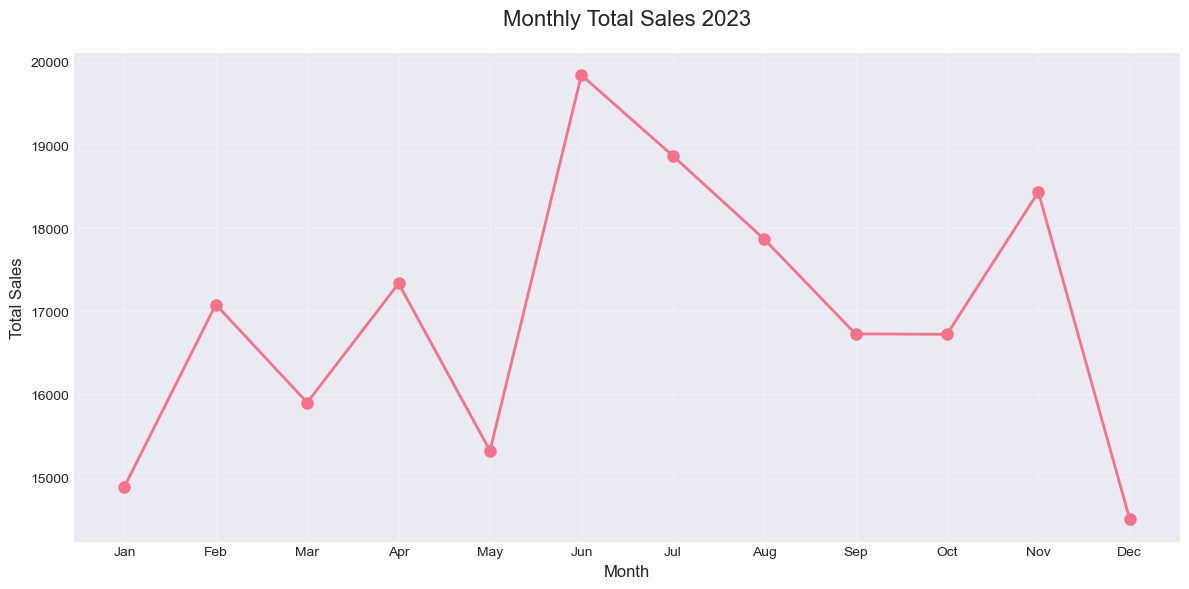

In [ ]:
# Visualization 1: Monthly Sales Trend (Line Plot)
plt.figure(figsize=(12, 6))
monthly_sales = df.groupby('month')['sales'].sum()
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linewidth=2, markersize=8)
plt.title('Monthly Total Sales 2023', fontsize=16, pad=20)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

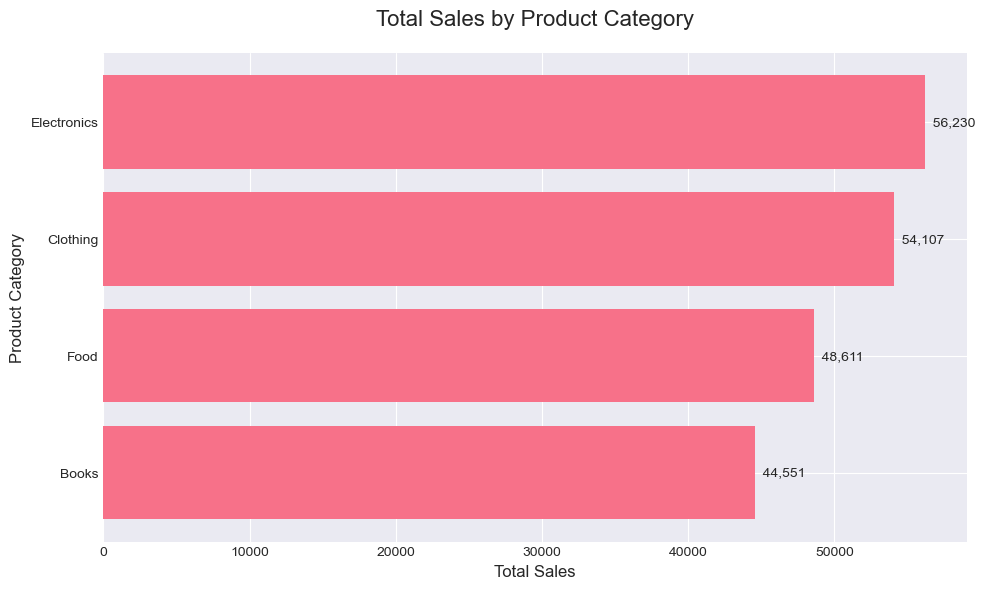

In [ ]:
# Visualization 2: Sales by Product Category (Bar Plot)
plt.figure(figsize=(10, 6))
category_sales = df.groupby('product_category')['sales'].sum().sort_values(ascending=True)
bars = plt.barh(category_sales.index, category_sales.values)
plt.title('Total Sales by Product Category', fontsize=16, pad=20)
plt.xlabel('Total Sales', fontsize=12)
plt.ylabel('Product Category', fontsize=12)

# Add value labels
for i, (category, value) in enumerate(category_sales.items()):
    plt.text(value, i, f'  {value:,.0f}', va='center')

plt.tight_layout()
plt.show()

In [ ]:
# Visualization 3: Sales by Payment Method (Pie Chart)
plt.figure(figsize=(8, 8))
payment_sales = df.groupby('payment_method')['sales'].sum()
colors = ['#ff9999', '#66b3ff', '#99ff99']
plt.pie(payment_sales.values, labels=payment_sales.index, autopct='%1.1f%%', 
        colors=colors, startangle=90, shadow=True)
plt.title('Sales Distribution by Payment Method', fontsize=16, pad=20)
plt.axis('equal')
plt.tight_layout()
plt.show()

In [ ]:
# Visualization 4: Sales vs Customer Count Relationship (Scatter Plot)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['customer_count'], df['sales'], 
                     c=df['month'], cmap='viridis', alpha=0.6, s=50)
plt.colorbar(scatter, label='Month')
plt.title('Relationship Between Sales and Customer Count', fontsize=16, pad=20)
plt.xlabel('Customer Count', fontsize=12)
plt.ylabel('Sales', fontsize=12)

# Add trend line
z = np.polyfit(df['customer_count'], df['sales'], 1)
p = np.poly1d(z)
plt.plot(df['customer_count'], p(df['customer_count']), "r--", alpha=0.8, label='Trend Line')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Visualization 5: Sales Distribution by Day of Week (Box Plot)
plt.figure(figsize=(12, 6))
week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.boxplot(x='day_of_week', y='sales', data=df, order=week_order)
plt.title('Sales Distribution by Day of Week', fontsize=16, pad=20)
plt.xlabel('Day', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Print key insights
print("="*60)
print("KEY INSIGHTS")
print("="*60)

# 1. Best performing month
best_month = monthly_avg_sales.index[0]
best_month_value = monthly_avg_sales.iloc[0]
print(f"1. Best performing month: {best_month} (Average {best_month_value:.0f} sales)")

# 2. Best performing day
best_day = daily_avg_sales.index[0]
best_day_value = daily_avg_sales.iloc[0]
print(f"2. Best performing day: {best_day} (Average {best_day_value:.0f} sales)")

# 3. Best performing category
best_category = category_sales.index[0]
best_category_value = category_sales.iloc[0]
print(f"3. Best performing category: {best_category} (Total {best_category_value:,.0f} sales)")

# 4. Most popular payment method
best_payment = payment_sales.index[0]
best_payment_pct = (payment_sales.iloc[0] / payment_sales.sum()) * 100
print(f"4. Most popular payment method: {best_payment} ({best_payment_pct:.1f}%)")

# 5. Average daily sales
avg_daily_sales = df['sales'].mean()
print(f"5. Average daily sales: {avg_daily_sales:.0f}")

# 6. Total yearly sales
total_yearly_sales = df['sales'].sum()
print(f"6. Total sales for 2023: {total_yearly_sales:,.0f}")

KEY INSIGHTS
1. Best performing month: June (Average 661 sales)
2. Best performing day: Saturday (Average 599 sales)
3. Best performing category: Books (Total 44,551 sales)
4. Most popular payment method: Mobile Payment (34.4%)
5. Average daily sales: 558
6. Total sales for 2023: 203,499
